 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

X_train = mnist_trainset.data.numpy().reshape(-1, 784) / 255.0
Y_train = mnist_trainset.targets.numpy()
X_test = mnist_testset.data.numpy().reshape(-1, 784) / 255.0
Y_test = mnist_testset.targets.numpy()

# Splitting training data into training and validation sets
split_size = int(X_train.shape[0] * 0.8)
X_val = X_train[split_size:]
Y_val = Y_train[split_size:]
X_train = X_train[:split_size]
Y_train = Y_train[:split_size]


##################################################
#Define the architecture
##################################################

#Complete the below function to implement ReLU activation function
def ReLu(inp):
    outp = np.maximum(0, inp)
    return outp

#Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    outp = (inp > 0).astype(float)
    return outp

#Complete the below function to implement softmax activation function
def softmax(inp):
    exp_x = np.exp(inp - np.max(inp, axis=1, keepdims=True))
    outp = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return outp

#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights
    X = inputs

    # Forward pass
    Z1 = X.dot(W1)
    A1 = ReLu(Z1)
    Z2 = A1.dot(W2)
    A2 = ReLu(Z2)
    Z3 = A2.dot(W3)
    Y_hat = softmax(Z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return Y_hat, (Z1, A1, Z2, A2, Z3, Y_hat)

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    Z1, A1, Z2, A2, Z3, Y_hat = activations
    m = targets.shape[0]

    # Gradient on third layer weights
    dZ3 = Y_hat.copy()
    dZ3[range(m), targets] -= 1
    dZ3 /= m
    dW3 = A2.T.dot(dZ3)

    # Gradient on second layer weights
    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * gradReLu(Z2)
    dW2 = A1.T.dot(dZ2)

    # Gradient on first layer weights
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * gradReLu(Z1)
    dW1 = inputs.T.dot(dZ1)

    # Return the gradients
    return [dW1, dW2, dW3]


#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dW1, dW2, dW3 = gradients

    # Update the parameters
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    # Return the updated parameters
    return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    # Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations)

    # Update the parameters using gradients
    weights = applyGradients(weights, gradients, learning_rate)

    # Return the updated parameters
    return weights

def cross_entropy_loss(output, target):
    m = target.shape[0]
    log_likelihood = -np.log(output[range(m), target])
    loss = np.sum(log_likelihood) / m
    return loss

def accuracy(output, target):
    predictions = np.argmax(output, axis=1)
    return np.mean(predictions == target)

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):

    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Split the training data into two parts.
    # Use 90 percent of training data for training the network.
    # Remaining 10 percent as validation data
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    # Randomly initialize the weights
    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            Y_batch = Y_train[start_idx:end_idx]

            # Forward propagation
            activations, cache = fwdPropagate(X_batch, weights)

            # Backward propagation
            weights = backPropagate(X_batch, Y_batch, weights, cache, learning_rate)

        # Compute outputs on training data
        train_preds, _ = fwdPropagate(X_train, weights)

        # Compute training accuracy, and training error
        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        # Compute outputs on validation data
        val_preds, _ = fwdPropagate(X_val, weights)

        # Compute validation accuracy, and validation error
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)

        # Print the statistics of training
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    # Save the parameters of network
    return weights

# Call the training function to train the network
trained_weights = training(X_train, Y_train, batch_size=128, epochs=10, learning_rate=0.1)

##################################################
#Evaluate the performance on test data
##################################################

# Testing the model
test_preds, _ = fwdPropagate(X_test, trained_weights)
test_loss = cross_entropy_loss(test_preds, Y_test)
test_acc = accuracy(test_preds, Y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1, Training Loss: 0.5823349001214811, Training Accuracy: 0.8205729166666667, Validation Loss: 0.5934411892981512, Validation Accuracy: 0.8139583333333333
Epoch 2, Training Loss: 0.3603562395931421, Training Accuracy: 0.896328125, Validation Loss: 0.38133207086597476, Validation Accuracy: 0.8880208333333334
Epoch 3, Training Loss: 0.27604555151714666, Training Accuracy: 0.921328125, Validation Loss: 0.3039534662591337, Validation Accuracy: 0.9098958333333333
Epoch 4, Training Loss: 0.2193489518130094, Training Accuracy: 0.9372135416666667, Validation Loss: 0.25409715707818836, Validation Accuracy: 0.9255208333333333
Epoch 5, Training Loss: 0.18158532425541898, Training Accuracy: 0.9471354166666667, Validation Loss: 0.21934031532999565, Validation Accuracy: 0.9359375
Epoch 6, Training Loss: 0.1477941720447346, Training Accuracy: 0.9581770833333333, Validation Loss: 0.18588171

<b> Report your observations </b>

1. Throughout the epochs, there is a steady improvement in both the training and validation accuracy; at the conclusion of the 10th epoch, the Accuracy is around 96% , which can be improved further is num epochs is set to around 30.
2. Effective learning is shown by a decrease in both the validation loss and the training loss throughout the epochs. But since the model is optimised using training data, the training loss drop is more constant, as predicted.
3. The model's resilience and strong capacity to generalise to new datasets are demonstrated by high test accuracy that was attained, which closely matched the validation accuracy.




<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

def sigmoid_gradient(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def tanh_gradient(x):
    return 1 - np.tanh(x)**2

def relu_gradient(x):
    return (x > 0).astype(float)

def leaky_relu_gradient(x, alpha=0.01):
    return (x > 0).astype(float) + alpha * (x <= 0).astype(float)



def forward_pass(X, weights, activation_fn):
    W1, W2, W3 = weights

    Z1 = X.dot(W1)
    A1 = activation_fn(Z1)
    Z2 = A1.dot(W2)
    A2 = activation_fn(Z2)
    Z3 = A2.dot(W3)
    Y_hat = softmax(Z3)

    cache = (Z1, A1, Z2, A2, Z3, Y_hat)
    return Y_hat, cache

def backward_pass(X, Y, weights, cache, activation_gradient):
    W1, W2, W3 = weights
    Z1, A1, Z2, A2, Z3, Y_hat = cache
    m = Y.shape[0]
    dZ3 = Y_hat.copy()
    dZ3[range(m), Y] -= 1
    dZ3 /= m
    dW3 = A2.T.dot(dZ3)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * activation_gradient(Z2)
    dW2 = A1.T.dot(dZ2)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * activation_gradient(Z1)
    dW1 = X.T.dot(dZ1)

    return [dW1, dW2, dW3]

def train(inputs, targets_idx, activation_fn, activation_gradient,batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]

        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)

            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            weights = applyGradients (weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)

        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)

        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

activation_functions = {
    "Sigmoid": (sigmoid, sigmoid_gradient),
    "Tanh": (tanh, tanh_gradient),
    "ReLU": (relu, relu_gradient),
    "LeakyReLU": (leaky_relu, leaky_relu_gradient)
}

for name, (activation_fn, activation_gradient) in activation_functions.items():
    print(f"Training with {name} activation function:")
    trained_weights = train(X_train, Y_train, batch_size=128, epochs=10, learning_rate=0.1, activation_fn=activation_fn, activation_gradient=activation_gradient)

    # Testing the model
    test_preds, _ = forward_pass(X_test, trained_weights, activation_fn)
    test_loss = cross_entropy_loss(test_preds, Y_test)
    test_acc = accuracy(test_preds, Y_test)
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')


Training with Sigmoid activation function:
Epoch 1, Training Loss: 2.3326099201492823, Training Accuracy: 0.09645833333333333, Validation Loss: 2.3353824011394395, Validation Accuracy: 0.09885416666666667
Epoch 2, Training Loss: 2.314172485846626, Training Accuracy: 0.10328125, Validation Loss: 2.3129514472185035, Validation Accuracy: 0.104375
Epoch 3, Training Loss: 2.3098060167624443, Training Accuracy: 0.10059895833333334, Validation Loss: 2.3094243762619384, Validation Accuracy: 0.0978125
Epoch 4, Training Loss: 2.2809159275605797, Training Accuracy: 0.16606770833333334, Validation Loss: 2.281592192347597, Validation Accuracy: 0.17083333333333334
Epoch 5, Training Loss: 1.945705050361011, Training Accuracy: 0.28447916666666667, Validation Loss: 1.942492582279162, Validation Accuracy: 0.29072916666666665
Epoch 6, Training Loss: 1.3498426389093818, Training Accuracy: 0.5221354166666666, Validation Loss: 1.3511736829961356, Validation Accuracy: 0.5220833333333333
Epoch 7, Training Los

<b> Report your observations </b>

1. In this classification job, both ReLU and Leaky ReLU show good accuracy; nevertheless, ReLU is preferred more because of its processing efficiency. ReLU is computationally lighter than other activation functions like sigmoid and tanh because of its straightforward thresholding action. These other activation functions need more intricate mathematical calculations.

2. ReLU has also been shown to help with the problem of vanishing gradients, which may arise with tanh and sigmoid functions, particularly in deeper neural networks. Better generalisation performance and quicker convergence during training may result from this.

3. It is evident that depending on the job, selecting the right activation function is crucial. It is evident that Relu provides the best classification accuracy, and sigmoid ought to be our least favourite option.






<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [ ]:
def cross_entropy_loss(output, target):
    m = target.shape[0]
    log_likelihood = -np.log(output[range(m), target])
    loss = np.sum(log_likelihood) / m
    return loss

def accuracy(output, target):
    predictions = np.argmax(output, axis=1)
    return np.mean(predictions == target)

def train_with_adam(inputs, targets_idx, activation_fn, activation_gradient,batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    beta1 = 0.9
    beta2 = 0.999
    eps = 1e-8
    m_t = [np.zeros_like(w) for w in weights]
    v_t = [np.zeros_like(w) for w in weights]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)
            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            for j in range(len(weights)):
                m_t[j] = beta1 * m_t[j] + (1 - beta1) * grads[j]
                v_t[j] = beta2 * v_t[j] + (1 - beta2) * (grads[j] ** 2)
                m_t_hat = m_t[j] / (1 - beta1 ** (epoch + 1))
                v_t_hat = v_t[j] / (1 - beta2 ** (epoch + 1))
                weights[j] -= learning_rate * m_t_hat / (np.sqrt(v_t_hat) + eps)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)

        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)

        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

activation_fn = relu
activation_gradient = relu_gradient

print("Training with Adam optimizer:")
adam_trained_weights = train_with_adam(X_train, Y_train, epochs=10, batch_size=64, learning_rate=0.01, activation_fn=activation_fn, activation_gradient=activation_gradient)

print("Training with SGD optimizer:")
sgd_trained_weights = train(X_train, Y_train, epochs=10, batch_size=64, learning_rate=0.01, activation_fn=activation_fn, activation_gradient=activation_gradient)

adam_test_preds, _ = forward_pass(X_test, adam_trained_weights, activation_fn)
adam_test_loss = cross_entropy_loss(adam_test_preds, Y_test)
adam_test_acc = accuracy(adam_test_preds, Y_test)
print(f'Adam Test Loss: {adam_test_loss}, Adam Test Accuracy: {adam_test_acc}')

sgd_test_preds, _ = forward_pass(X_test, sgd_trained_weights, activation_fn)
sgd_test_loss = cross_entropy_loss(sgd_test_preds, Y_test)
sgd_test_acc = accuracy(sgd_test_preds, Y_test)
print(f'SGD Test Loss: {sgd_test_loss}, SGD Test Accuracy: {sgd_test_acc}')


Training with Adam optimizer:
Epoch 1, Training Loss: 0.10829936563108002, Training Accuracy: 0.9660416666666667, Validation Loss: 0.15979926978751752, Validation Accuracy: 0.9535416666666666
Epoch 2, Training Loss: 0.06560107000214249, Training Accuracy: 0.9793489583333334, Validation Loss: 0.14522424637791587, Validation Accuracy: 0.9605208333333334


<b> Report your observations </b>

1. Adam uses adaptive learning rates, which cause faster convergence and improved performance, particularly in situations when the gradients are different. He does this by modifying the learning rates for each parameter separately based on their historical gradients.

2. Less sensitive to hyperparameters: Compared to SGD, Adam frequently requires fewer epochs to converge and produces good results with less processing resources. This is because Adam is less sensitive to the choice of hyperparameters.

3. Adds Momentum: Adam uses momentum to buffer oscillations and accelerate gradients in the appropriate direction, which helps to improve stability and convergence times during training.




<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [ ]:
##################################################
#Training with weight regularization
##################################################


def l2_regularization(weights, lambda_reg):
    l2_reg = 0
    for w in weights:
        l2_reg += 0.5 * lambda_reg * np.sum(w ** 2)
    return l2_reg

def train_with_weight_regularization(inputs, targets_idx, activation_fn, activation_gradient, lambda_reg, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)

            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            for j in range(len(weights)):
                grads[j] += lambda_reg * weights[j]

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train) + l2_regularization(weights, lambda_reg)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val) + l2_regularization(weights, lambda_reg)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

##################################################
#Training with dropout strategy
##################################################

def dropout(X, dropout_prob):
    mask = np.random.rand(*X.shape) < dropout_prob
    return X * mask / dropout_prob, mask

def train_with_dropout(inputs, targets_idx, activation_fn, activation_gradient, dropout_prob, batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001 ):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Z1 = X_batch.dot(weights[0])
            A1 = activation_fn(Z1)
            A1_dropout, mask = dropout(A1, dropout_prob)
            Z2 = A1_dropout.dot(weights[1])
            A2 = activation_fn(Z2)
            Z3 = A2.dot(weights[2])
            Y_hat = softmax(Z3)

            cache = (Z1, A1, mask, Z2, A2, Z3, Y_hat)

            dZ3 = Y_hat.copy()
            dZ3[range(X_batch.shape[0]), Y_batch] -= 1
            dZ3 /= X_batch.shape[0]
            dW3 = A2.T.dot(dZ3)

            dA2 = dZ3.dot(weights[2].T)
            dZ2 = dA2 * activation_gradient(Z2)
            dW2 = A1_dropout.T.dot(dZ2)

            dA1_dropout = dZ2.dot(weights[1].T)
            dA1_dropout *= mask
            dA1 = dA1_dropout / dropout_prob
            dZ1 = dA1 * activation_gradient(Z1)
            dW1 = X_batch.T.dot(dZ1)

            grads = [dW1, dW2, dW3]

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

    return weights

##################################################
#Training with early stopping criterion
##################################################
def train_with_early_stopping(inputs, targets_idx, activation_fn, activation_gradient,  batch_size=128, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    split_size = int(n_samples * train_val_split)
    X_train = inputs[:split_size]
    Y_train = targets_idx[:split_size]
    X_val = inputs[split_size:]
    Y_val = targets_idx[split_size:]

    input_dim = X_train.shape[1]
    W1 = np.random.randn(input_dim, hidden_units) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(hidden_units, n_classes) * 0.01
    weights = [W1, W2, W3]

    best_val_loss = float('inf')
    best_weights = None
    epochs_without_improvement = 0
    max_epochs_without_improvement = 5

    for epoch in range(epochs):
        shuffle_indices = np.random.permutation(split_size)
        X_train = X_train[shuffle_indices]
        Y_train = Y_train[shuffle_indices]
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_train[i:i+batch_size]
            Y_batch = Y_train[i:i+batch_size]

            Y_hat, cache = forward_pass(X_batch, weights, activation_fn)

            grads = backward_pass(X_batch, Y_batch, weights, cache, activation_gradient)

            weights = applyGradients(weights, grads, learning_rate)

        train_preds, _ = forward_pass(X_train, weights, activation_fn)
        train_loss = cross_entropy_loss(train_preds, Y_train)
        train_acc = accuracy(train_preds, Y_train)

        val_preds, _ = forward_pass(X_val, weights, activation_fn)
        val_loss = cross_entropy_loss(val_preds, Y_val)
        val_acc = accuracy(val_preds, Y_val)
        print(f'Epoch {epoch + 1}, Training Loss: {train_loss}, Training Accuracy: {train_acc}, Validation Loss: {val_loss}, Validation Accuracy: {val_acc}')

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_weights = weights
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= max_epochs_without_improvement:
                print("Early stopping triggered. No improvement in validation loss.")
                break

    return best_weights

activation_fn = relu
activation_gradient = relu_gradient

lambda_reg = 0.001
dropout_prob = 0.2

print("Training with weight regularization:")
weights_with_regularization = train_with_weight_regularization(X_train, Y_train,  epochs=10, batch_size=64, learning_rate=0.1, activation_fn=activation_fn, activation_gradient=activation_gradient, lambda_reg=lambda_reg)

print("Training with dropout strategy:")
weights_with_dropout = train_with_dropout(X_train, Y_train, epochs=10, batch_size=64, learning_rate=0.1, activation_fn=activation_fn, activation_gradient=activation_gradient, dropout_prob=dropout_prob)

print("Training with early stopping criterion:")
weights_with_early_stopping = train_with_early_stopping(X_train, Y_train, epochs=10, batch_size=64, learning_rate=0.1, activation_fn=activation_fn, activation_gradient=activation_gradient)

test_preds_regularization, _ = forward_pass(X_test, weights_with_regularization, activation_fn)
test_loss_regularization = cross_entropy_loss(test_preds_regularization, Y_test)
test_acc_regularization = accuracy(test_preds_regularization, Y_test)
print(f'Test Loss with weight regularization: {test_loss_regularization}, Test Accuracy with weight regularization: {test_acc_regularization}')

test_preds_dropout, _ = forward_pass(X_test, weights_with_dropout, activation_fn)
test_loss_dropout = cross_entropy_loss(test_preds_dropout, Y_test)
test_acc_dropout = accuracy(test_preds_dropout, Y_test)
print(f'Test Loss with dropout strategy: {test_loss_dropout}, Test Accuracy with dropout strategy: {test_acc_dropout}')

test_preds_early_stopping, _ = forward_pass(X_test, weights_with_early_stopping, activation_fn)
test_loss_early_stopping = cross_entropy_loss(test_preds_early_stopping, Y_test)
test_acc_early_stopping = accuracy(test_preds_early_stopping, Y_test)
print(f'Test Loss with early stopping criterion: {test_loss_early_stopping}, Test Accuracy with early stopping criterion: {test_acc_early_stopping}')




Training with weight regularization:
Epoch 1, Training Loss: 0.4452654222582135, Training Accuracy: 0.8851302083333333, Validation Loss: 0.4670031760201243, Validation Accuracy: 0.8734375
Epoch 2, Training Loss: 0.2953269787791544, Training Accuracy: 0.9328645833333333, Validation Loss: 0.3286003560070369, Validation Accuracy: 0.9220833333333334
Epoch 3, Training Loss: 0.25329113431181005, Training Accuracy: 0.9477083333333334, Validation Loss: 0.29009318788006144, Validation Accuracy: 0.9370833333333334
Epoch 4, Training Loss: 0.20493939680488354, Training Accuracy: 0.9632552083333333, Validation Loss: 0.24842165827266421, Validation Accuracy: 0.9465625
Epoch 5, Training Loss: 0.18618310589307818, Training Accuracy: 0.9684895833333333, Validation Loss: 0.23102061178555874, Validation Accuracy: 0.9515625
Epoch 6, Training Loss: 0.17251283157624214, Training Accuracy: 0.9748697916666667, Validation Loss: 0.21992874162723114, Validation Accuracy: 0.9609375
Epoch 7, Training Loss: 0.15766

<b> Report your observations </b>

1. Weight Regularisation: Depending on the size of the weights, methods such as L1 and L2 regularisation add penalty terms to the loss function. This promotes simpler and more generalised models and penalises excessive weight values, discouraging the use of unduly complicated models.

2. Dropout: A portion of input units (neurons) are randomly set to zero during training so that they cannot contribute to the forward pass. By inhibiting co-adaptation between neurons and pushing the network to acquire more resilient characteristics, this method lessens overfitting.

3. Early Stopping: During training, early stopping entails keeping an eye on the model's performance on a validation set. The training procedure is stopped when the validation set performance starts to decline. By ending the training process before the model's performance on untested data begins to deteriorate, this avoids overfitting.

4. Reduction of Loss: These regularisation strategies likely to lessen training-related loss while simultaneously preventing overfitting. Regularisation techniques can reduce loss values and enhance generalisation by encouraging simpler models, avoiding co-adaptation, and ending training at an ideal time.









<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



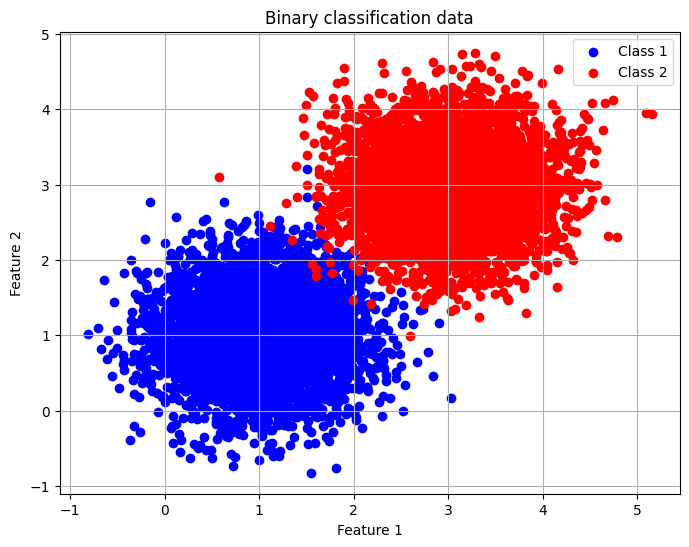

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


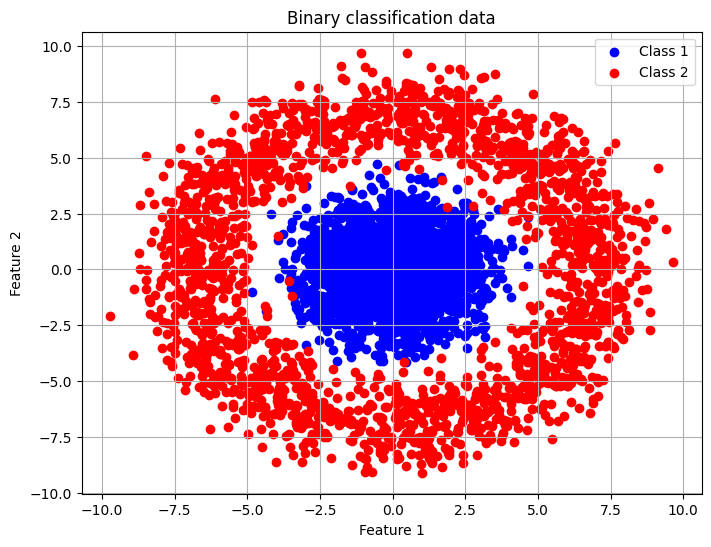

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)
tr_data_2 = np.concatenate([class1_data, class2_data], axis=0)
tr_targets_2 = np.concatenate([np.zeros(len(class1_data)), np.ones(len(class2_data))])
class1_test, class2_test = generate_concentric_data(200, radius1,radius2,noise_std)
te_data_2 = np.concatenate([class1_test, class2_test], axis=0)
te_targets_2 = np.concatenate([np.zeros(len(class1_test)), np.ones(len(class2_test))])


# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



Logistic Regression Accuracy: 0.998


<ipython-input-143-b2a68b34b30d>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


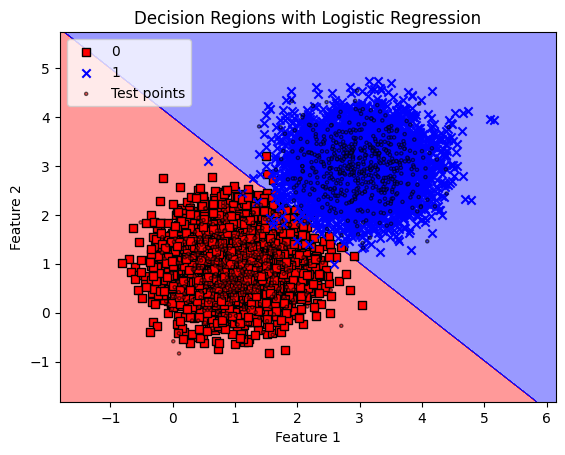

Epoch 1 Training Accuracy =  0.98625
Epoch 1 Validation Accuracy =  0.9588888888888889  

Epoch 6 Training Accuracy =  0.9952777777777778
Epoch 6 Validation Accuracy =  0.9955555555555555  

Epoch 11 Training Accuracy =  0.9955555555555555
Epoch 11 Validation Accuracy =  0.9944444444444445  

Epoch 16 Training Accuracy =  0.9952777777777778
Epoch 16 Validation Accuracy =  0.9955555555555555  

Epoch 21 Training Accuracy =  0.9955555555555555
Epoch 21 Validation Accuracy =  0.995  

Epoch 26 Training Accuracy =  0.9955555555555555
Epoch 26 Validation Accuracy =  0.9938888888888889  

Testing Accuracy using Deep Neural Networks =  0.997


In [ ]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def Logistic_Regression(X_train, Y_train, X_test):
    max_iter = 1000
    threshold = 0.5
    X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w = np.random.randn(X.shape[1]) * 0.01

    for iter in range(max_iter):
        preds = 1 / (1 + np.exp(-X.dot(w)))
        error = preds - Y_train
        gradient = X.T.dot(error)
        H = (preds * (1 - preds) * X.T).dot(X)
        w -= np.linalg.pinv(H).dot(gradient)

    # Predictions on test data
    X_test_bias = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    test_preds = 1 / (1 + np.exp(-X_test_bias.dot(w))) > threshold
    return test_preds.astype(int)

def evaluate_accuracy(predictions, targets):
    return (predictions == targets).mean()

def plot_decision_regions(X, y, X_test, y_test, title):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = plt.cm.colors.ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = Logistic_Regression(X, y, np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', s=5, edgecolor='k', cmap=cmap, alpha=0.6, label='Test points')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(title)
    plt.show()




##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################



#Complete the below function to impliment forward propagation of data
def fwdPropagate(inputs, weights, biases):
    W1, W2, W3 = weights
    b1, b2, b3 = biases
    X = inputs

    # Forward pass
    Z1 = X.dot(W1) + b1
    A1 = ReLu(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = ReLu(Z2)
    Z3 = A2.dot(W3) +b3
    Y_hat = sigmoid(Z3)

    # Return the required outputs, i.e., final output and intermediate activations
    cache = [X, Z1, Z2, Y_hat]
    return cache

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations, biases):
    a0, a1, a2, y_out = activations
    W1, W2, W3 = weights
    b1, b2, b3 = biases

    dZ3 = y_out - targets
    dZ2 = dZ3 @ W3.T
    dZ2 *= gradReLu(a2)

    dZ1 = dZ2 @ W2.T
    dZ1 *= gradReLu(a1)

    z1 = ReLu(a1)
    z2 = ReLu(a2)

    db3 = np.sum(dZ3) / a0.shape[0]
    db2 = np.sum(dZ2) / a0.shape[0]
    db1 = np.sum(dZ1) / a0.shape[0]

    dW1 = a0.T@dZ1 / a0.shape[0]
    dW2 = z1.T@dZ2 / a0.shape[0]
    dW3 = z2.T@dZ3 / a0.shape[0]

    return [dW1, dW2, dW3, db1, db2, db3]

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate, biases):

    W1, W2, W3 = weights
    dW1, dW2, dW3, db1, db2, db3 = gradients
    b1, b2, b3 = biases

    # Update the parameters
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3

    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    b3 = b3 - learning_rate * db3

    # Return the updated parameters
    return [W1, W2, W3],[b1,b2,b3]

#Complete the below function to complete the backpropagation ste
def backPropagate(inputs, targets, weights, activations, learning_rate, biases):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm

    # Compute the gradients
    gradients = computeGradients(inputs, targets, weights, activations, biases)

    # Update the parameters using gradients
    weights,biases = applyGradients(weights, gradients, learning_rate, biases)

    # Return the updated parameters
    return weights, biases

def getpreds(y_out):
    return np.where(y_out > 0.5, 1, 0)

#Complete the below function to complete the training of network
def training(inputs, targets_idx, batch_size=1, epochs=30, train_val_split=0.8, learning_rate=0.001):
    hidden_units = 2
    n_classes = 1

    # Split the training data into two parts.
    # Use 90 percent of training data for training the network.
    # Remaining 10 percent as validation data
    size = int(inputs.shape[0] * train_val_split)

    X_train = inputs[:size, :]
    Y_train = targets_idx[:size]
    X_val = inputs[size:, :]
    Y_val = targets_idx[size:]

    n_samples = X_train.shape[0]
    n_batches = int(n_samples / batch_size)

    # Randomly initialize the weights
    W1 = np.random.rand(2, 3) - 0.5
    W2 = np.random.rand(3, 3) - 0.5
    W3 = np.random.rand(3, n_classes) - 0.5

    # Iterate for epochs times
    biases = np.random.rand(3)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_ind = np.random.permutation(X_train.shape[0])
        X_train = X_train[shuffle_ind, :]
        Y_train = Y_train[shuffle_ind]

        # Iterate through the batches of data
        for batch in range(n_batches):
            start_idx = batch * batch_size
            end_idx = (batch + 1) * batch_size
            X_batch = X_train[start_idx:end_idx]
            Y_batch = Y_train[start_idx:end_idx]

            activations = fwdPropagate(X_batch, weights, biases)

            # Backward propagation
            weights, biases = backPropagate(X_batch, Y_batch, weights, activations, learning_rate, biases)

        # Compute outputs on training data
        activations = fwdPropagate(X_train, weights, biases)
        y_out = activations[3]
        tr_acc = np.sum(getpreds(y_out) == np.array(Y_train.reshape(Y_train.shape[0], 1), dtype=np.intc)) / Y_train.shape[0]

        # Compute outputs on validation data
        activations = fwdPropagate(X_val, weights, biases)
        y_out = activations[3]

        # Compute validation accuracy
        valid_acc = np.sum(getpreds(y_out) == Y_val.reshape(Y_val.shape[0], 1)) / Y_val.shape[0]

        # Print the statistics of training
        if(epoch % 5 == 0):
            print('Epoch', epoch + 1, 'Training Accuracy = ', tr_acc)
            print('Epoch', epoch + 1, 'Validation Accuracy = ', valid_acc , " \n")

    # Save the parameters of the network
    return weights, biases


##################################################
#Evaluate the performance on test data
##################################################


logistic_preds = Logistic_Regression(tr_data, tr_targets, te_data)
logistic_acc = evaluate_accuracy(logistic_preds, te_targets)
print(f"Logistic Regression Accuracy: {logistic_acc}")

plot_decision_regions(tr_data, tr_targets, te_data, te_targets, 'Decision Regions with Logistic Regression')

tr_targets = np.array(tr_targets, dtype = np.intc)
weights, biases = training(tr_data, tr_targets)

_ = fwdPropagate(te_data, weights, biases)
y_out = _[3]
print('Testing Accuracy using Deep Neural Networks = ',np.sum(getpreds(y_out) == np.array(te_targets.reshape(te_targets.shape[0], 1), dtype = np.intc)) / te_targets.shape[0] )



<ipython-input-143-b2a68b34b30d>:50: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


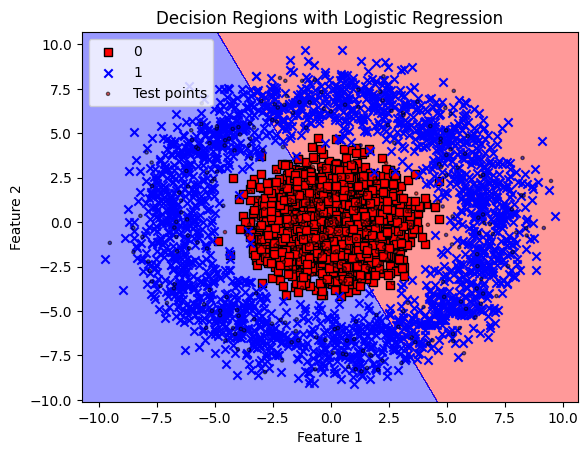

Epoch 1 Training Accuracy =  0.63
Epoch 1 Validation Accuracy =  0.02375  

Epoch 6 Training Accuracy =  0.873125
Epoch 6 Validation Accuracy =  0.69625  

Epoch 11 Training Accuracy =  0.985
Epoch 11 Validation Accuracy =  0.975  

Epoch 16 Training Accuracy =  0.990625
Epoch 16 Validation Accuracy =  0.98875  

Epoch 21 Training Accuracy =  0.9846875
Epoch 21 Validation Accuracy =  0.9825  

Epoch 26 Training Accuracy =  0.99125
Epoch 26 Validation Accuracy =  0.99375  

Epoch 31 Training Accuracy =  0.989375
Epoch 31 Validation Accuracy =  0.995  

Epoch 36 Training Accuracy =  0.9690625
Epoch 36 Validation Accuracy =  0.945  

Epoch 41 Training Accuracy =  0.9815625
Epoch 41 Validation Accuracy =  0.975  

Epoch 46 Training Accuracy =  0.993125
Epoch 46 Validation Accuracy =  0.99375  

Epoch 51 Training Accuracy =  0.9934375
Epoch 51 Validation Accuracy =  0.99375  

Epoch 56 Training Accuracy =  0.9821875
Epoch 56 Validation Accuracy =  0.9825  

Epoch 61 Training Accuracy =  0.9

In [ ]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
logistic_preds = Logistic_Regression(tr_data_2, tr_targets_2, te_data_2)
logistic_acc = evaluate_accuracy(logistic_preds, te_targets_2)


plot_decision_regions(tr_data_2, tr_targets_2, te_data_2, te_targets_2, 'Decision Regions with Logistic Regression')


##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################


tr_targets_2 = np.array(tr_targets_2, dtype = np.intc)
weights, biases = training(tr_data_2, tr_targets_2,epochs = 100)

_ = fwdPropagate(te_data_2, weights, biases)
y_out = _[3]
print('Testing Accuracy using Deep Neural Networks = ',np.sum(getpreds(y_out) == np.array(te_targets_2.reshape(te_targets_2.shape[0], 1), dtype = np.intc)) / te_targets_2.shape[0] )
print(f"Logistic Regression Accuracy: {logistic_acc}")






<b> Report your observations </b>

1. Comparable Accuracy in Linearly Separable Data: Based on test data that has not yet been observed, both logistic regression and the Deep Neural Network (DNN) in the given example achieve comparable accuracies on linearly separable data.

2. Superior Performance in Non-linearly Separable Data by DNN: The DNN performs noticeably better than logistic regression when handling non-linearly separable data. With its poor accuracy of about 50%, logistic regression generates a linear decision boundary that is unable to sufficiently segregate the data. The input data is, however, transformed into a higher-dimensional space by the DNN, where it may be separated linearly. As a result, the DNN may get a significantly greater accuracy of about 99%.

3. Overall DNN Superiority: The DNN regularly performs better than other models for a variety of data types. It is more successful in identifying the underlying structure of the data and achieves higher classification accuracy as a result of its capacity to understand intricate patterns and correlations.

4. Robustness to Data Complexity: DNNs may learn intricate non-linear relationships within the data, in contrast to logistic regression, which is based on linear decision limits. They can now manage the more complex patterns and variations found in real-world datasets, which enhances accuracy and performance.

5. Feature Representation Learning: Using several levels of abstraction, DNNs are highly effective in automatically picking up significant representations of the input features. They are better at differentiating between classes because they can collect both low-level and high-level features because to this hierarchical feature learning.

